Performanță pentru KNN:
Raport de clasificare:
              precision    recall  f1-score   support

       Gliom       0.65      1.00      0.79        15
   Meningiom       1.00      0.67      0.80        15
      Adenom       1.00      1.00      1.00        15
     Sănătos       1.00      0.80      0.89        15

    accuracy                           0.87        60
   macro avg       0.91      0.87      0.87        60
weighted avg       0.91      0.87      0.87        60

Acuratețea validării: 85.00%
Acuratețea testării: 86.67%


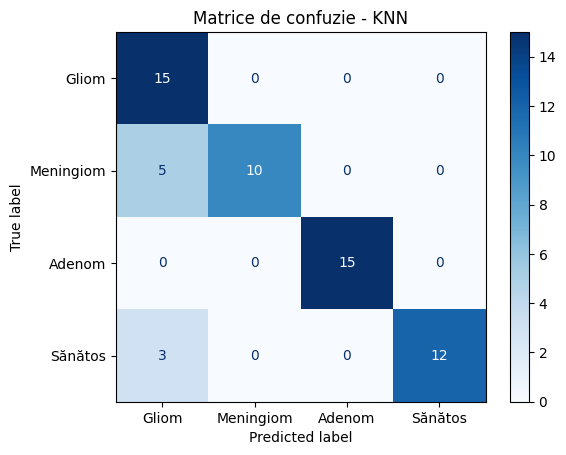

Performanță pentru Naive Bayes:
Raport de clasificare:
              precision    recall  f1-score   support

       Gliom       1.00      0.87      0.93        15
   Meningiom       0.78      0.93      0.85        15
      Adenom       0.80      0.80      0.80        15
     Sănătos       0.79      0.73      0.76        15

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60

Acuratețea validării: 91.67%
Acuratețea testării: 83.33%


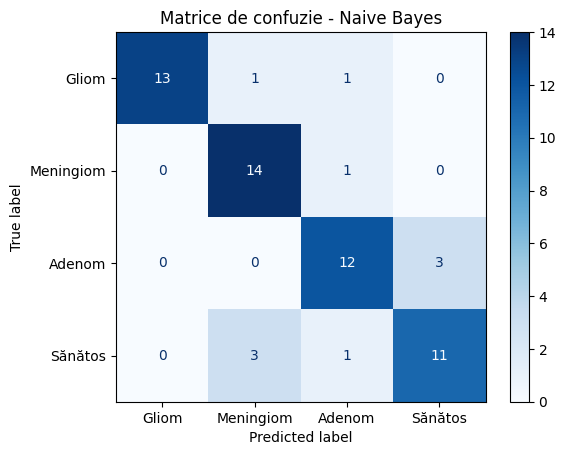

Exemple de predicții pentru KNN:


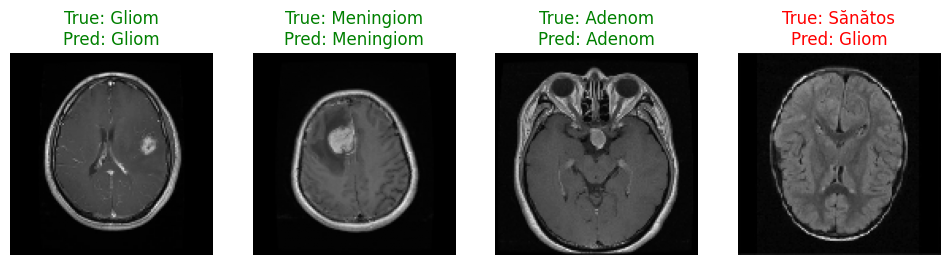

Exemple de predicții pentru Naive Bayes:


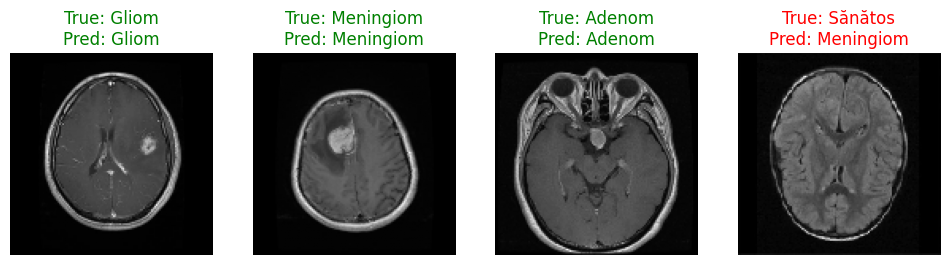

In [28]:
import os
import numpy as np
import cv2
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# 1. Funcție pentru încărcarea imaginilor și redimensionarea lor
def load_images_from_folder(folder, label, img_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        image_path = os.path.join(folder, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            image_resized = cv2.resize(image, img_size)  # Redimensionăm imaginea
            images.append(image_resized)
            labels.append(label)  # Adăugăm eticheta corespunzătoare
    return np.array(images), np.array(labels)

# 2. Specificăm folderele pentru antrenare, validare și testare
train_folder = {
    "gliom": "/content/drive/MyDrive/SetDeDate/train/Gliom",
    "meningiom": "/content/drive/MyDrive/SetDeDate/train/Meningiom",
    "adenom pituitar": "/content/drive/MyDrive/SetDeDate/train/Adenom pituitar",
    "sanatos": "/content/drive/MyDrive/SetDeDate/train/Sanatos",
}
val_folder = {
    "gliom": "/content/drive/MyDrive/SetDeDate/validation/Gliom",
    "meningiom": "/content/drive/MyDrive/SetDeDate/validation/Meningiom",
    "adenom pituitar": "/content/drive/MyDrive/SetDeDate/validation/Adenom pituitar",
    "sanatos": "/content/drive/MyDrive/SetDeDate/validation/Sanatos",
}
test_folder = {
    "gliom": "/content/drive/MyDrive/SetDeDate/test/Gliom",
    "meningiom": "/content/drive/MyDrive/SetDeDate/test/Meningiom",
    "adenom pituitar": "/content/drive/MyDrive/SetDeDate/test/Adenom pituitar",
    "sanatos": "/content/drive/MyDrive/SetDeDate/test/Sanatos",
}

# 3. Încărcăm imaginile pentru fiecare subset
def load_dataset(folders, img_size=(128, 128)):
    X, y = [], []
    for label, folder in enumerate(folders.values()):
        images, labels = load_images_from_folder(folder, label, img_size)
        X.extend(images)
        y.extend(labels)
    return np.array(X), np.array(y)

X_train, y_train = load_dataset(train_folder)
X_val, y_val = load_dataset(val_folder)
X_test, y_test = load_dataset(test_folder)

# 4. Aplatizăm imaginile pentru a le utiliza în clasificatori
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# 5. Setăm valoarea constantă pentru k
k_value = 7

# 6. Antrenăm și testăm KNN
knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(X_train_flat, y_train)

# Predicții pentru validare și testare
y_val_pred_knn = knn.predict(X_val_flat)
y_test_pred_knn = knn.predict(X_test_flat)

# Calculăm acuratețea
accuracy_val_knn = accuracy_score(y_val, y_val_pred_knn)
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)

# 7. Antrenăm și testăm Naive Bayes
nb = GaussianNB()
nb.fit(X_train_flat, y_train)

# Predicții pentru validare și testare
y_val_pred_nb = nb.predict(X_val_flat)
y_test_pred_nb = nb.predict(X_test_flat)

# Calculăm acuratețea
accuracy_val_nb = accuracy_score(y_val, y_val_pred_nb)
accuracy_test_nb = accuracy_score(y_test, y_test_pred_nb)

# 8. Funcție pentru afișarea rezultatelor
def display_results(model_name, y_true, y_pred, accuracy_val, accuracy_test):
    print(f"Performanță pentru {model_name}:")
    print("Raport de clasificare:")
    print(classification_report(y_true, y_pred, target_names=["Gliom", "Meningiom", "Adenom", "Sănătos"]))
    print(f"Acuratețea validării: {accuracy_val * 100:.2f}%")
    print(f"Acuratețea testării: {accuracy_test * 100:.2f}%")
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Gliom", "Meningiom", "Adenom", "Sănătos"])
    disp.plot(cmap=plt.cm.Blues, colorbar=True)
    plt.title(f"Matrice de confuzie - {model_name}")
    plt.show()

# 9. Funcție pentru afișarea imaginilor de testare și a predicțiilor
def display_sample_predictions(X, y_true, y_pred, class_names):
    plt.figure(figsize=(12, 8))
    displayed_classes = set()
    for i in range(len(y_true)):
        if y_true[i] not in displayed_classes:
            plt.subplot(1, len(class_names), len(displayed_classes) + 1)
            plt.imshow(X[i], cmap="gray")
            true_label = class_names[y_true[i]]
            pred_label = class_names[y_pred[i]]

            title_color = "green" if y_true[i] == y_pred[i] else "red"

            plt.title(f"True: {true_label}\nPred: {pred_label}", color=title_color)
            plt.axis("off")
            displayed_classes.add(y_true[i])
            if len(displayed_classes) == len(class_names):
                break
    plt.show()

# Rezultate pentru KNN
display_results("KNN", y_test, y_test_pred_knn, accuracy_val_knn, accuracy_test_knn)

# Rezultate pentru Naive Bayes
display_results("Naive Bayes", y_test, y_test_pred_nb, accuracy_val_nb, accuracy_test_nb)

# Afișăm un exemplu din fiecare clasă pentru KNN
class_names = ["Gliom", "Meningiom", "Adenom", "Sănătos"]
print("Exemple de predicții pentru KNN:")
display_sample_predictions(X_test, y_test, y_test_pred_knn, class_names)

# Afișăm un exemplu din fiecare clasă pentru Naive Bayes
print("Exemple de predicții pentru Naive Bayes:")
display_sample_predictions(X_test, y_test, y_test_pred_nb, class_names)